# Linear Models in Machine Learning on Python - Logistic Regression 2

Welcome to the second notebook on Logistic Regression. In this notebook we will go into details of regularization of Logistic Regression. Afterwards, we will talk about another important concept that arises while dealing with regularization is hyperparameter tuning, by extension of that, cross-validation.  I will talk about these concept and extend our idea on these functions and models.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore', module='sklearn')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

## Mathematics Under the Hood Regularization of Logistic Regression

Okay if you are familiar with regularization in Linear Regression (I covered it in my Linear Regression notebooks), regularization of Logistic Regression won't be so hard for you.

Let's start by revisiting our cost function.

$$J\left(\theta\right)=-\frac{1}{m}\left[\sum _{i=1}^my^{\left(i\right)}log\left(h_{\theta }\left(x^{\left(i\right)}\right)\right)+\left(1-y^{\left(i\right)}\right)log\left(1-h_{\theta }\left(x^{\left(i\right)}\right)\right)\right]$$

### Ridge Regularization in Logistic Regression

Okay now Let's add L2 term into the cost function, this step is actually almost the same as adding the term to Linear Regression. We just add penalization terms to our cost function as follows:


$$J\left(\theta\right)=-\frac{1}{m}\left[\sum _{i=1}^m\:y^{\left(i\right)}log\left(h_{\theta }\left(x^{\left(i\right)}\right)\right)+\left(1-y^{\left(i\right)}\right)log\left(1-h_{\theta }\left(x^{\left(i\right)}\right)\right)\right]+\frac{\lambda}{2m}\sum_{j=1}^n\theta^2_j$$

Let's get derivative of the cost function so that we can use gradient vector for updating our weights.

$$\frac{\partial }{\partial \theta }\left(J\left(\theta\right)\right)=\frac{1}{m}\sum _{i=1}^m\left(h_{\theta }\left(x^{\left(i\right)}\right)-y^{\left(i\right)}\right)^2\cdot x_j^{\left(i\right)}+\frac{\lambda }{m}\theta _j$$


Okay now we will write down our update rule. It's almost identical to linear regression but be careful about hypothesis. In all of these equations we have a different hypothesis than linear regression. Moreover, we don't use regularization on bias term $\theta_0$, that's why, we need a slightly different update rule for it.

Update rule for bias term:

$$\theta _0:=\theta _0-\:\alpha \left(\frac{1}{m}\:\sum _{i=1}^m\left(h_{\theta }\left(x^{\left(i\right)}\right)-y^{\left(i\right)}\right)^2\cdot \:x_0^{\left(i\right)}\right)\:$$


General update rule for j>0:

$$\theta_j:=\theta _j-\:\alpha \left(\frac{1}{m}\:\sum _{i=1}^m\left(h_{\theta }\left(x^{\left(i\right)}\right)-y^{\left(i\right)}\right)^2\cdot \:x_j^{\left(i\right)}+\frac{\lambda }{m}\cdot \theta_j \right)\:$$


### Lasso Regularization in Logistic Regression

Let's also look at L1-regularized logistic regression cost function.


$$J\left(\theta\right)=-\frac{1}{m}\left[\sum _{i=1}^my^{\left(i\right)}log\left(h_{\theta }\left(x^{\left(i\right)}\right)\right)+\left(1-y^{\left(i\right)}\right)log\left(1-h_{\theta }\left(x^{\left(i\right)}\right)\right)\right]+\frac{\lambda}{m}\sum _{j=1}^n\left|\theta _j\right|$$


You probably remember when we add L1 penalty, the cost function doesn't have a closed form solution anymore. This is also the case for logistic regression as well. However, here we won't use subgradient descent as we used it for linear regression, instead we will use different optimization algorithms.

I previously talked about how `LogisticRegression()` uses  *LFBGS* as its default optimization algorithm. You can use only `liblinear` and `saga` optimization algorithms with L1 regularization. I have recently read through my notes on these optimization algorithms so that perhaps I can talk about them here as well but I think it would be so complex to talk about them here and I would miss the point of preparing these notebooks, which is to provide application and mathematics behind these algorithms. If I go through talking about these optimization algorithms It would be out of the scope of this notebook (I will only talk about optimization of SVM because I think it's really important to learn it for understanding the algorithm). You can check which optimization algorithms you can use with different regularizations in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

I didn't want to write down elastic net cost function because we are just combining L1 and L2 in it, there is nothing special. A note I think I should talk about is again about optimization, we can only use elastic net with saga optimization. Check out Logistic Regression documentation for learning more about optimization algorithms you can use [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)



### Lasso Regularization in Logistic Regression

Let's also look at L1-regularized logistic regression cost function.

$$J\left(\theta\right)=-\frac{1}{m}\left[\sum _{i=1}^my^{\left(i\right)}log\left(h_{\theta }\left(x^{\left(i\right)}\right)\right)+\left(1-y^{\left(i\right)}\right)log\left(1-h_{\theta }\left(x^{\left(i\right)}\right)\right)\right]+\frac{\lambda}{m}\sum _{j=1}^n\left|\theta _j\right|$$


You probably remember when we add L1 penalty, the cost function doesn't have a closed form solution anymore. This is also the case for logistic regression as well. However, here we won't use subgradient descent as we used it for linear regression, instead we will use different optimization algorithms.

I previously talked about how `LogisticRegression()` uses  *LFBGS* as its default optimization algorithm. You can use only `liblinear` and `saga` optimization algorithms with L1 regularization. I have recently read through my notes on these optimization algorithms so that perhaps I can talk about them here as well but I think it would be so complex to talk about them here and I would miss the point of preparing these notebooks, which is to provide application and mathematics behind these algorithms. If I go through talking about these optimization algorithms It would be out of the scope of this notebook (I will only talk about optimization of SVM because I think it's really important to learn it for understanding the algorithm). You can check which optimization algorithms you can use with different regularizations in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

I didn't want to write down elastic net cost function because we are just combining L1 and L2 in it, there is nothing special. A note I think I should talk about is again about optimization, we can only use elastic net with saga optimization. Check out Logistic Regression documentation for learning more about optimization algorithms you can use [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

## Australia Rain Dataset

Instead of using basic datasets, I wanted to use one that we need to do some preprocessing. The reason I provide these preprocessing steps is to get you familiar with them by showing how I do it again and again. I will not do all the necessary preprocessing steps since this notebook is about regularization of Logistic Regression but you can complete the preprocessing part (or perhaps improve it) so that you may get a better result in the end.

Let's load our dataset

In [2]:
data=pd.read_csv("weatherAUS.csv")
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Preprocessing

I will do the three preprocessing steps below

1. Dealing with missing values.
2. One-Hot Encoding the categorical features
3. Scaling the numerical Features.

Apart from that, It would be nice to deal with outliers and if I did that I would also use min-max scaling (Here I will use StandardScaler). Furthermore, I won't look at distributions of predictors and it would be nice to convert skewed features. 

I will use full preprocessing in my last logistic regression notebook in which I will more focus on application. Here I just wanted to apply the necessary steps.

### Finding Missing values in Categorical and Numerical Features

In [3]:
categorical = [features for features in data.columns if data[features].dtype==object] # getting names of categorical columns
data[categorical].head(5)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


Let's look at how many missing values we have in each categorical feature.

In [4]:
data[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

I will also do the same steps for numerical features.

In [5]:
numerical = [features for features in data.columns if data[features].dtype==float]  # getting names of numerical columns
data[numerical].head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [6]:
data[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

Now we have some information about missing values in categorical and numerical features. Let's now deal with them.

### Filling Missing Values

Before dealing with these missing values I will split date into three columns. I start with doing that because I do not need to fit `SimpleImputer()` on date since there aren't any missing values in this column, I will split it into three columns as day/month/year.

In [7]:
# Firstly let's check whether or not the feature's type is Date
data["Date"].dtype

dtype('O')

Let's define a function that splits Date into Year,Month and Day.

In [8]:
# I will
def splitdate(data_s):
    data_s["Date"] = pd.to_datetime(data_s["Date"]) #convert it to date
    data_s["Year"]=data_s["Date"].dt.year # Parsing year 
    data_s["Month"]=data_s["Date"].dt.month # Parsing month
    data_s["Day"]=data_s["Date"].dt.day # Parsing day
    data_s =  data_s.drop(["Date"], axis=1) # Dropping original Date row
    return data_s;

Now Let's fill in these missing values. I will use two different imputers since we need different strategies for categorical and numerical features. For categorical ones, I will use mode (most_freguent) and for numerical features, I will use median as strategy.

In [9]:
imputer = SimpleImputer(strategy="most_frequent")
categorical = [features for features in data.columns if data[features].dtype==object]
imputer.fit(data[categorical])

SimpleImputer(strategy='most_frequent')

Let's look at our categorical features after using the imputer.

In [10]:
categorical_x=imputer.transform(data[categorical])
categorical_x

array([['2008-12-01', 'Albury', 'W', ..., 'WNW', 'No', 'No'],
       ['2008-12-02', 'Albury', 'WNW', ..., 'WSW', 'No', 'No'],
       ['2008-12-03', 'Albury', 'WSW', ..., 'WSW', 'No', 'No'],
       ...,
       ['2017-06-23', 'Uluru', 'N', ..., 'WNW', 'No', 'No'],
       ['2017-06-24', 'Uluru', 'SE', ..., 'N', 'No', 'No'],
       ['2017-06-25', 'Uluru', 'W', ..., 'ESE', 'No', 'No']], dtype=object)

Now I will use SimpleImputer on numerical features.

In [122]:
imputer2 = SimpleImputer(strategy="median")
numarical_x=imputer2.fit_transform(data[numerical])
numarical_x

array([[13.4, 22.9,  0.6, ...,  5. , 16.9, 21.8],
       [ 7.4, 25.1,  0. , ...,  5. , 17.2, 24.3],
       [12.9, 25.7,  0. , ...,  2. , 21. , 23.2],
       ...,
       [ 5.4, 26.9,  0. , ...,  5. , 12.5, 26.1],
       [ 7.8, 27. ,  0. , ...,  2. , 15.1, 26. ],
       [14.9, 22.6,  0. , ...,  8. , 15. , 20.9]])

I will convert all the steps I did above into a single transformer. This is something that I showed in my linear regression notebooks that's why, I won't talk about making our own transformers but I will explain the code.

1. **__init__:**
Here I use `splitdate()` function and get names of categorical and numerical features in our dataset. The only thing that I didn't show above in this code is numerical_int64 variable. When we split our Date into Year/Month/Day columns, all of these columns have int64 data type. I here select them seperately, I could use one variable to find all the numerical features but I didn't. you can do it if you'd like :)
2. **transform:** 
The first four lines of codes are the same as the one I used above. Apart from that, the other codes are for concataneting arrays and converting it to dataframe.

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class Convert_Missing(BaseEstimator, TransformerMixin):
    def __init__(self,data): # no *args or **kargs
        print("Transforming in progress...")
        self.data=data;
        self.splitted_data=splitdate(data);
        self.categorical = [features for features in self.splitted_data.columns if self.splitted_data[features].dtype==object]
        self.numerical = [features for features in self.splitted_data.columns if self.splitted_data[features].dtype==float]
        self.numerical_int64 = [features for features in self.splitted_data.columns if self.splitted_data[features].dtype=='int64']
    def transform(self):
        imputer = SimpleImputer(strategy="most_frequent")
        features_categorical=imputer.fit_transform(self.splitted_data[self.categorical])
        imputer = SimpleImputer(strategy="median")
        features_numeric=imputer.fit_transform(self.splitted_data[self.numerical])
        concatenated_array=np.concatenate((features_categorical,features_numeric),axis=1)#concatane arrays obtained from imputer
        dataframe=pd.DataFrame(concatenated_array, columns=self.categorical+self.numerical) # convert it to dataframe
        frames = [dataframe, data[self.numerical_int64]] # combining the dataframe in the previous line and date dataframe 
        final_dataframe=pd.concat(frames,axis=1)  # concataneting the two dataframes in the previous line
        final_dataframe=final_dataframe.loc[:,~final_dataframe.columns.duplicated()]
        print("Transforming completed")
        return final_dataframe

In [12]:
missing_transformer=Convert_Missing(data)
data4=missing_transformer.transform()

Transforming in progress...
Transforming completed


### One-hot encoding Categorical Features

Instead of using OneHotEncoder, I will use `get_dummies()` I find it easier when working with dataframes. Let's firstly look at how many columns we have in our dataframe.

In [13]:
len(data4.columns)

25

Let's find out how many new columns we will get after one hot encoding.

In [14]:
categorical = [features for features in data.columns if data[features].dtype==object]
num_enc_cols = (data4[categorical].apply(lambda x: x.nunique()).sort_values(ascending=False))
num_enc_cols

Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [15]:
sum(num_enc_cols)

101

We will get 101 new columns but also delete the originals ones, so we will probably have 118 columns in the end. Let's define our function that we will use for One-Hot Encoding. Here I will not encode **RainTomorrow** because I will use it as our target class and will encode that feature with `LabelEncoder()`. Moreover, I will also use LabelEncoder for RainToday as well.

In [16]:
le=LabelEncoder()
def One_Hot_Encoder(data):
    data=pd.concat([data[numerical],data[categorical],data[numerical_int64],pd.get_dummies(data.Location), 
                     pd.get_dummies(data.WindGustDir),
                     pd.get_dummies(data.WindDir9am),
                     pd.get_dummies(data.WindDir3pm)],axis=1)
    data["RainToday"]=le.fit_transform(data["RainToday"])
    data.drop(['Location','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)
    return data;

In [17]:
numerical_int64 = [features for features in data4.columns if data4[features].dtype=='int64']
data_enc=One_Hot_Encoder(data4)

In [18]:
data_enc.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


I guessed right !!!

### Scaling Numerical Features

Now In our last step I will scale numerical features.

In [19]:
StandardScaler()
scaler = StandardScaler()
numerical_data = scaler.fit_transform(data_enc[numerical])

In [20]:
numerical_data

array([[ 0.18975691, -0.0445749 , -0.20358073, ...,  0.13769321,
        -0.01350553,  0.0191346 ],
       [-0.75278601,  0.26579424, -0.27509664, ...,  0.13769321,
         0.03301131,  0.3840643 ],
       [ 0.11121166,  0.35044037, -0.27509664, ..., -1.28629394,
         0.62222462,  0.22349523],
       ...,
       [-1.06696699,  0.51973264, -0.27509664, ...,  0.13769321,
        -0.69575252,  0.64681369],
       [-0.68994982,  0.53384032, -0.27509664, ..., -1.28629394,
        -0.29260657,  0.6322165 ],
       [ 0.42539264, -0.08689797, -0.27509664, ...,  1.56168036,
        -0.30811219, -0.11224009]])

In [21]:
numerical_data = pd.DataFrame(numerical_data, columns=[numerical])
numerical_data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.189757,-0.044575,-0.203581,-0.119472,0.14871,0.307739,0.673596,0.611499,0.111308,-1.443652,-1.478015,-1.223012,1.464068,0.137693,-0.013506,0.019135
1,-0.752786,0.265794,-0.275097,-0.119472,0.14871,0.307739,-1.131913,0.382054,-1.320650,-1.297105,-1.047010,-1.117969,0.149133,0.137693,0.033011,0.384064
2,0.111212,0.350440,-0.275097,-0.119472,0.14871,0.460168,0.560752,0.840944,-1.638863,-1.052860,-1.492877,-0.982915,0.149133,-1.286294,0.622225,0.223495
3,-0.470023,0.674917,-0.275097,-0.119472,0.14871,-1.216548,-0.342003,-1.109339,-1.267615,-1.736746,-0.006653,-0.367666,0.149133,0.137693,0.172562,0.705202
4,0.833828,1.281548,-0.155903,-0.119472,0.14871,0.079096,-0.793380,0.152609,0.694699,-0.906314,-1.017286,-1.388078,1.025756,1.561680,0.126045,1.172312


Let's drop numerical columns from our original dataframe so that we can add the scaled ones.

In [22]:
data_enc.drop(numerical,axis=1,inplace=True)

I will use `concat()` function from Pandas to merge the two DataFrames.

In [23]:
data_processed=pd.concat([numerical_data, data_enc],axis=1) 

In [24]:
data_processed

,"(MinTemp,)","(MaxTemp,)","(Rainfall,)","(Evaporation,)","(Sunshine,)","(WindGustSpeed,)","(WindSpeed9am,)","(WindSpeed3pm,)","(Humidity9am,)","(Humidity3pm,)",...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.189757,-0.044575,-0.203581,-0.119472,0.14871,0.307739,0.673596,0.611499,0.111308,-1.443652,...,0,0,0,0,0,0,0,0,1,0
1,-0.752786,0.265794,-0.275097,-0.119472,0.14871,0.307739,-1.131913,0.382054,-1.320650,-1.297105,...,0,0,0,0,0,0,0,0,0,1
2,0.111212,0.350440,-0.275097,-0.119472,0.14871,0.460168,0.560752,0.840944,-1.638863,-1.052860,...,0,0,0,0,0,0,0,0,0,1
3,-0.470023,0.674917,-0.275097,-0.119472,0.14871,-1.216548,-0.342003,-1.109339,-1.267615,-1.736746,...,0,0,0,0,0,0,0,0,0,0
4,0.833828,1.281548,-0.155903,-0.119472,0.14871,0.079096,-0.793380,0.152609,0.694699,-0.906314,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,-1.475402,0.025964,-0.275097,-0.119472,0.14871,-0.683048,-0.116314,-0.879894,-0.949402,-1.345954,...,0,0,0,0,0,0,0,0,0,0
145456,-1.349730,0.294010,-0.275097,-0.119472,0.14871,-1.368977,-0.116314,-1.109339,-0.684224,-1.492501,...,0,0,0,0,0,0,0,0,0,0
145457,-1.066967,0.519733,-0.275097,-0.119472,0.14871,-0.225761,-0.567692,-1.109339,-0.843331,-1.345954,...,0,0,0,0,0,0,0,0,1,0
145458,-0.689950,0.533840,-0.275097,-0.119472,0.14871,-0.911691,-0.116314,-1.338784,-0.949402,-1.345954,...,0,0,0,0,0,0,0,0,0,0


Okay now let's define our own scaling function which also deals with this merging step of two dataframes.

In [25]:
def scaleandmerge(data):
    numerical_data = scaler.fit_transform(data[numerical])
    numerical_data = pd.DataFrame(numerical_data, columns=[numerical])
    data.drop(numerical,axis=1,inplace=True)
    data_processed=pd.concat([numerical_data, data],axis=1) 
    return data_processed

To try out the function, let's get a clear copy of the dataframe.

In [26]:
data_enc=One_Hot_Encoder(data4)

Let's apply our function

In [27]:
data_processed=scaleandmerge(data_enc[numerical])

C:\Users\gorke\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
data_processed.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.189757,-0.044575,-0.203581,-0.119472,0.14871,0.307739,0.673596,0.611499,0.111308,-1.443652,-1.478015,-1.223012,1.464068,0.137693,-0.013506,0.019135
1,-0.752786,0.265794,-0.275097,-0.119472,0.14871,0.307739,-1.131913,0.382054,-1.320650,-1.297105,-1.047010,-1.117969,0.149133,0.137693,0.033011,0.384064
2,0.111212,0.350440,-0.275097,-0.119472,0.14871,0.460168,0.560752,0.840944,-1.638863,-1.052860,-1.492877,-0.982915,0.149133,-1.286294,0.622225,0.223495
3,-0.470023,0.674917,-0.275097,-0.119472,0.14871,-1.216548,-0.342003,-1.109339,-1.267615,-1.736746,-0.006653,-0.367666,0.149133,0.137693,0.172562,0.705202
4,0.833828,1.281548,-0.155903,-0.119472,0.14871,0.079096,-0.793380,0.152609,0.694699,-0.906314,-1.017286,-1.388078,1.025756,1.561680,0.126045,1.172312


We defined all the necessary functions that we need for preprocessing part. Now let's merge all of these function, by doing so, I will only use the function below to process the data. Basically, we can think that as I'm defining my own pipeline.

In [29]:
def combinedprocessing(data):
    missing_transformer=Convert_Missing(data)
    data1=missing_transformer.transform()
    data2=One_Hot_Encoder(data1)
    data3=scaleandmerge(data2)
    return data3;

In [30]:
data_processed=combinedprocessing(data)

Transforming in progress...
Transforming completed


The preprocessing part is over. Now I will use `train_test_split()` but before that, I need to get our target feature. Additionally, I will also use `LabelEncoder()` for encoding our target feature.

In [31]:
le=LabelEncoder()
target=le.fit_transform(data_processed["RainTomorrow"])
data_processed.drop(["RainTomorrow"],axis=1,inplace=True) #deleting target feature from the data

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_processed, target, test_size = 0.2, random_state = 42)

Firstly, let's construct a baseline LogisticRegression model so that we can compare the results of regularization.

In [33]:
logreg = LogisticRegression()

In [34]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred_test = logreg.predict(X_test)

In [36]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8398


Before getting on with Regularization, I want to check the balance between the two class.

C:\Users\gorke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

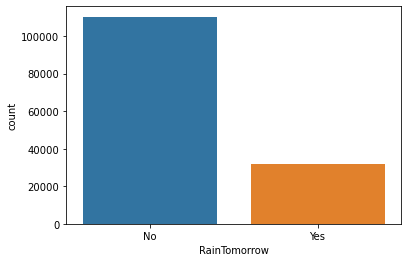

In [37]:
sns.countplot(data["RainTomorrow"])

In [38]:
np.unique(target)

array([0, 1])

Okay, the target is imbalanced and there is a huge gap between the two labels. I will deal with that problem later but before that let's get back to our original topic in this notebook Regularization.

### L1 Regularization

Using Regularization with logistic regression is pretty easy, you just need to specify `penalty` parameter with the regularization technique you want.

In [39]:
logreg = LogisticRegression(penalty="l1",solver="liblinear")

In [40]:
logreg.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [41]:
y_pred_test_l1 = logreg.predict(X_test)

In [42]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_l1)))

Model accuracy score: 0.8477


### L2 Regularization

In [43]:
logreg = LogisticRegression(penalty="l2",solver="newton-cg",max_iter=250)

In [ ]:
logreg.fit(X_train, y_train)

In [45]:
y_pred_test_l2 = logreg.predict(X_test)

In [46]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_l2)))

Model accuracy score: 0.8478


### Elastic Net

In [47]:
logreg = LogisticRegression(penalty="elasticnet",solver="saga",l1_ratio=0.5)

In [48]:
logreg.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [49]:
y_pred_test_en = logreg.predict(X_test)

In [50]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_en)))

Model accuracy score: 0.8301


When we look at accuracy it looks like L1 and L2 regularization both improves the performance compared to our baseline model, whereas, Elastic Net does not. Moreover, keep in mind that accuracy may deceive us in this case because we have a highly-imbalanced target.

Let's plot confusion matrix of all of these models.

In [51]:
def plot_confusion(y,y_pred):
    if isinstance(y_pred, (np.ndarray)):
        plt.figure(figsize=(10, 7))
        cm=confusion_matrix(y, y_pred)
        
        plt.figure(figsize=(10, 7))
        group_names =['TN','FS','FN','TP']
        
        group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
        group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]

        labels = [f'{v1}\n\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
    
        sns.heatmap(cm, annot=labels, fmt='', cmap='mako',annot_kws={"fontsize":20})

    else:
        
        f, axes = plt.subplots(1, 3,figsize=(18,5))
        for i in range(3):
            cm=confusion_matrix(y, y_pred[i])
            plt.figure(figsize=(10, 7))
            group_names =['TN','FS','FN','TP']
            group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
            group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
            labels = [f'{v1}\n\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
            labels = np.asarray(labels).reshape(2,2)
            sns.heatmap(cm, annot=labels, fmt='', cmap='mako',annot_kws={"fontsize":20},ax=axes[i])

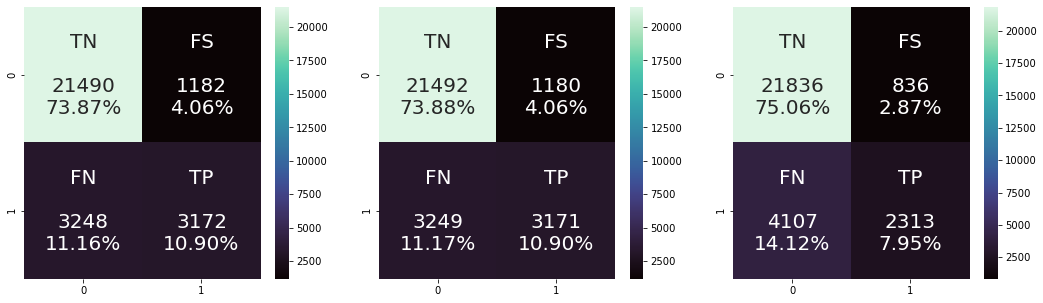

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [52]:
plot_confusion(y_test, [y_pred_test_l1,y_pred_test_l2,y_pred_test_en])

Let's also use Precision Recall Curve

In [53]:
def plot_precisionvsrecall(y,y_pred):
    if isinstance(y_pred, (np.ndarray)):
        plt.figure(figsize=(10, 7))
        precisions, recalls, thresholds = precision_recall_curve(y, y_pred)
        sns.set_style("darkgrid")
        ax=sns.lineplot(x=precisions, y=recalls ,linewidth = 2)
        ax.set_xlabel("Precision",fontsize=15)
        ax.set_ylabel("Recall",fontsize=15)
        ax.text(0.7 * (0.25 + 0.25+ 0.5), 0.80 * (0.25 + 0.25+ 0.5), 'AUC=%.3f' % auc(recalls, precisions),size=14)
        ax.text(0.3 * (0.25 + 0.25+ 0.5), 0.20 * (0.25 + 0.25+ 0.5), 'F1-Score =%.3f' % f1_score(y, y_pred),size=14)
        
    else: 
        f, axes = plt.subplots(1, 3,figsize=(17,5))
        for i in range(3):
            precisions, recalls, thresholds = precision_recall_curve(y, y_pred[i])
            sns.set_style("darkgrid")
            ax=sns.lineplot(x=precisions, y=recalls ,ax=axes[i],linewidth = 2)
            ax.set_xlabel("Precision",fontsize=15)
            ax.set_ylabel("Recall",fontsize=15)
            ax.text(0.7 * (0.25 + 0.25+ 0.5), 0.80 * (0.25 + 0.25+ 0.5), 'AUC=%.3f' % auc(recalls, precisions),size=14)
            ax.text(0.3 * (0.25 + 0.25+ 0.5), 0.20 * (0.25 + 0.25+ 0.5), 'F1-Score =%.3f' % f1_score(y, y_pred[i]),size=14)


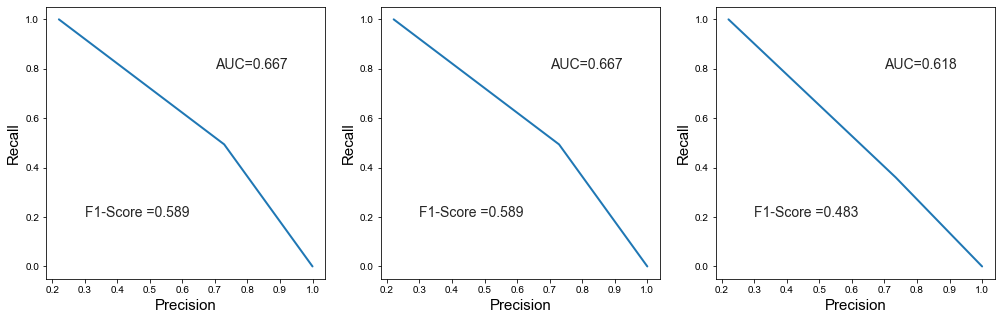

In [54]:
plot_precisionvsrecall(y_test, [y_pred_test_l1, y_pred_test_l2, y_pred_test_en])

## Hyperparameter Tuning and Cross Validation

Now normally, I would get on with hyperparameter tuning but before that there is a topic that we should revisit. It is cross validation. Since we will also use cross validation in hyperparameter tuning I want to talk about it before I use GridSearchVS or RandomSearchCV.


When I used `countplot()` we saw that there is a big class imbalance in our target feature. There are ways to deal with this class imbalance which I will talk about later, apart from that, this class imbalance also causes some problems when we use `train_test_-split()`. The function `train_test_split()` uses a random sampling strategy, that is not a problem when we have a large number of instances and there is not a big class imbalance but this is not the case here in this dataset. 

Let's say that we are conveying a public survey and ask people whether or not they think supplements are healthy, we wouldn't ask randomly 1000 people that question but we would find 1000 people who are representative of the general population so that we would ensure this people's idea will reflect the public opinion. This is actually something about Central Limit Theorem in Statistics but talking about it may be out of scope, however you can find more information about Central Limit Theorem [AN INTRODUCTION TO THE CENTRAL LIMIT THEOREM AND SAMPLING TECHNIQUES](https://www.datascienceprophet.com/an-introduction-to-the-central-limit-theorem-and-sampling-techniques/). 

This processes of finding a group of people who are representative of a bigger population is called stratified sampling: we divide our instances (in this case population) into homogenous subgroups called strata and we sample our instances to each stratum to guarantee that they are representative of the overall population.

To do that we will use some function let's learn about them.



We can use data stratification with `train_test_split()` function.To do that we need to specify which column we will use for stratification. The function will use this specified column to sample homogenously.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(data_processed, target, test_size = 0.2, random_state = 42,stratify = target)

We can also use another function called `StratifiedShuffleSplit()`

In [56]:
from sklearn.model_selection import StratifiedShuffleSplit

In [57]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(data_processed, target):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data_processed.loc[train_index], data_processed.loc[test_index]
    y_train, y_test = target[train_index], target[test_index]

TRAIN: [108450 106460  55052 ...  58256  84461 127247] TEST: [111817  69937  82278 ...   1166  35035  73611]


StratifiedShuffleSplit provides us an important parameter called **n_splits**. This parameter basically defines the number of times we will split our data.

In [58]:
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(data_processed, target):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data_processed.loc[train_index], data_processed.loc[test_index]
    y_train, y_test = target[train_index], target[test_index]

TRAIN: [108450 106460  55052 ...  58256  84461 127247] TEST: [111817  69937  82278 ...   1166  35035  73611]
TRAIN: [ 91116 110103  69046 ...  32318  78120  59290] TEST: [ 56334  88728 126830 ...  88311  55460  74019]
TRAIN: [ 45790  59259  23624 ...  84689   8801 112582] TEST: [ 84295  81039 106060 ... 133354 119511  14060]


 You may wonder why we should split the data more than ones. As you can see when we get different splits we also get different train and test sets. We can train a new model on each split and average the test score to get a better model in the end. This is actually a concept that is very similar to something called Repeated K-Fold Cross Validation. I will talk about this method later but you can also google it now to see how it works.
 
Let's train logistic regression on 3 different splits and see the test results.

In [59]:
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
test_scores=[]
for train_index, test_index in sss.split(data_processed, target):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data_processed.loc[train_index], data_processed.loc[test_index]
    y_train, y_test = target[train_index], target[test_index]
    logreg = LogisticRegression(penalty="l1",solver="liblinear",max_iter=250)
    logreg.fit(X_train, y_train)
    y_pred_test_l2 = logreg.predict(X_test)
    test_scores.append(accuracy_score(y_test, y_pred_test_l2))
test_scores    

TRAIN: [108450 106460  55052 ...  58256  84461 127247] TEST: [111817  69937  82278 ...   1166  35035  73611]
TRAIN: [ 91116 110103  69046 ...  32318  78120  59290] TEST: [ 56334  88728 126830 ...  88311  55460  74019]
TRAIN: [ 45790  59259  23624 ...  84689   8801 112582] TEST: [ 84295  81039 106060 ... 133354 119511  14060]


[0.8508868417434347, 0.8489619139282277, 0.8496493881479444]

In [60]:
test_scores

[0.8508868417434347, 0.8489619139282277, 0.8496493881479444]

There is another function `StratifiedKFold()` which is very similar to KFold function that we used for linear regression but this time function does stratified sampling. There is informative stackoverflow discussion about the difference between `StratifiedKFold()` and `KFold()` which you can check [link](https://stackoverflow.com/questions/65318931/stratifiedkfold-vs-kfold-in-scikit-learn)

In [61]:
skf = StratifiedKFold(n_splits=3)

In [62]:
test_scores=[]
for train_index, test_index in skf.split(data_processed, target):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data_processed.loc[train_index], data_processed.loc[test_index]
    y_train, y_test = target[train_index], target[test_index]
    logreg = LogisticRegression(penalty="l1",solver="liblinear",max_iter=250)
    logreg.fit(X_train, y_train)
    y_pred_test_l2 = logreg.predict(X_test)
    test_scores.append(accuracy_score(y_test, y_pred_test_l2))
test_scores     

TRAIN: [ 48422  48425  48426 ... 145457 145458 145459] TEST: [    0     1     2 ... 48733 48738 48742]
TRAIN: [     0      1      2 ... 145457 145458 145459] TEST: [48422 48425 48426 ... 97618 97619 97620]
TRAIN: [    0     1     2 ... 97618 97619 97620] TEST: [ 94000  94001  94003 ... 145457 145458 145459]


[0.8267783117124178, 0.7845814341988574, 0.839953801097224]

You may wonder why we got different scores that StratifiedShuffleSplit, that's because this two function returns different test sets. `StratifiedKFold()` returns non-overlapping test set whereas test set returned by `StratifiedShuffleSplit()` can be overlapping. I recommend reading this stackoverflow discussion on these functions [link](https://stackoverflow.com/questions/45969390/difference-between-stratifiedkfold-and-stratifiedshufflesplit-in-sklearn#:~:text=So%2C%20the%20difference%20here%20is,the%20test%20sets%20can%20overlap.) to see the difference.

Don't forget to check out documentation for [StratifiedShuffleSplit()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) and [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) Addititionaly, you can also check GeeksforGeeks for these function [StratifiedShuffleSplit()](https://www.geeksforgeeks.org/sklearn-stratifiedshufflesplit-function-in-python/) and [StratifiedKFold](https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/)


In addition, we can also pass these stratified versions into `cross_val_score()`. I will show more examples for this in the last notebook of Logistic Regression but I wanted to show it here as well.

In [63]:
logreg = LogisticRegression(penalty="l1",solver="liblinear",max_iter=250)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=250, penalty='l1', solver='liblinear')

In [64]:
# Using StratifiedKFold
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X_train, y_train, cv=skf, scoring="accuracy")

array([0.83718484, 0.82988399, 0.83900507])

In [65]:
# Using StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X_train, y_train, cv=sss, scoring="accuracy")

array([0.84666151, 0.84748647, 0.8447538 ])

### Hyperparameter Tuning

For hyperparameter tuning we can use `GridSearchCV()` and `RandomSearchCV()`. Since both of using these function is almost the same (not in terms of their algorithm but in terms of the way we use them) I will only use GridSearchCV() here. Let's look at which parameters we can tune with GridSearchCV().

In [67]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

You may be wondering what is that C parameter (I asked the question as well when I started using Python for Machine Learning). Well It turns out that the hyperparameter that controls strength of regularization is not $\lambda$ but instead it is controlled by the inverse of lambda 
$$C=\frac{1}{\lambda }$$

One thing that you should notice is since it's the inverse of lambda, as lambda increases the regularization strength will decrease and as lambda decreases, the regularization strength will increase.

Moreover, there is another parameter called **l1_ratio** and as far as I remember I didn't talk about this parameter in my linear regression notebooks. This parameter is the combination of L1 and L2 penalty terms. I realized that I didn't take note of any equation for l1_ratio in my notes and then searched online for the mathematical explanation below. What I represent below, with the mathematical concept of this l1_ratio is something that I'm not %100 percent sure but probably this is the case. So let's try to understand mathematically what l1_ratio represents.

In sklearn's documentation [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) the description of l1_ratio involves the following lines

* *The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.*

I looked at the paper [("Regularization Path For Generalized linear Models by Coordinate Descent")](https://www.jstatsoft.org/article/view/v033i01/v33i01.pdf) referenced in this [documentation](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net) then I came across with the following equation.

$$P_{\alpha }=\left(1\:−\:α\right)\:\frac{1}{2}\left|\left|\beta \right|\right|^2_{l2}+α\left|\left|\beta \right|\right|_{l1}=\sum _{j=1}^p\:\left(\left(1\:−\:α\right)\:\frac{1}{2}\beta ^2_{l2}+α\left|\beta \right|_{l1}\right)$$

Then I look at another [paper](https://sites.stat.washington.edu/courses/stat527/s13/readings/zouhastie05.pdf) referenced by the first paper and there was also a similar formula named elastic-net penalty which I stated below.

$$P_{\alpha \:}=\left(1\:−\:α\right)\:\left|\beta \right|^2+α\left|\beta \right|_{l1}$$

Afterwards, I saw that there is the sentence below in sklearn documentation and look at the documentation for [glmnet](https://cran.r-project.org/web/packages/glmnet/glmnet.pdf) in R.

* *The parameter l1_ratio corresponds to alpha in the glmnet R package while alpha corresponds to the lambda parameter in glmnet.*

In glmnet documentation there is a very similar formula for the elastic net penalty

$$\frac{\left(1\:−\:α\right)}{2}\sum vp_j\beta \:^2_j+α\sum vp_j\left|\beta \:\right|$$

So what do we get here ? 

In documentation of glmnet ${\alpha \:}$ is called elasticnet mixing parameter and in sklearn l1_ratio is called ElasticNet mixing parameter and also stated it is equal to ${\alpha \:}$ in glmnet. Therefore, probably (%99) sklearn uses the first formula I stated above which is 

$$P_{\alpha }=\left(1\:−\:α\right)\:\frac{1}{2}\left|\left|\beta \right|\right|^2_{l2}+α\left|\left|\beta \right|\right|_{l1}=\sum _{j=1}^p\:\left(\left(1\:−\:α\right)\:\frac{1}{2}\beta ^2_{l2}+α\left|\beta \right|_{l1}\right)$$

glmnet also uses parameters called $vp_j$ which are penalty factors for each of the coefficients. I do not know whether or not sklearn uses $vp_j$ but probably It does not. Moreover, if we get back to the first explanation for l1_ratio in sklearn we learnt that when l1_rati=1 the penalty becomes L1 penalty and for l1_ratio=0 it becomes L2. We can actually see $P_{\alpha }$ follows that rule as well when we set ${\alpha \:}$ to one or zero.

Let's get back to tuning these hyperparameters now.

In [68]:
logreg=LogisticRegression()

In [69]:
params = {
    'C':[100, 10, 1.0, 0.1, 0.01],
    'l1_ratio': [0.25,0.50, 0.75, 0.90],
    'penalty': ["l2","l1","elasticnet"],
    'fit_intercept':[True,False],
    'warm_start':[True,False],
    
}

In [76]:
from sklearn.model_selection import GridSearchCV
gscv=GridSearchCV(logreg, params, cv=skf,verbose=2,scoring="accuracy")

In [ ]:
model=gscv.fit(X_train, y_train)

In [78]:
predicted=model.predict(X_test)

In [79]:
accuracy_score(predicted,y_test)

0.8414181413191437

Now let's also create confusion matrix and precision-vs-recall curve.

<Figure size 720x504 with 0 Axes>

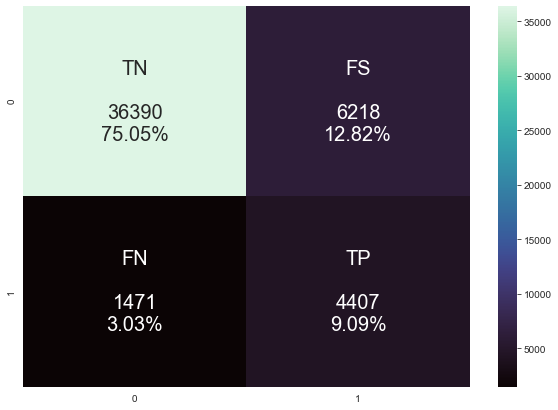

In [136]:
plot_confusion(predicted,y_test)

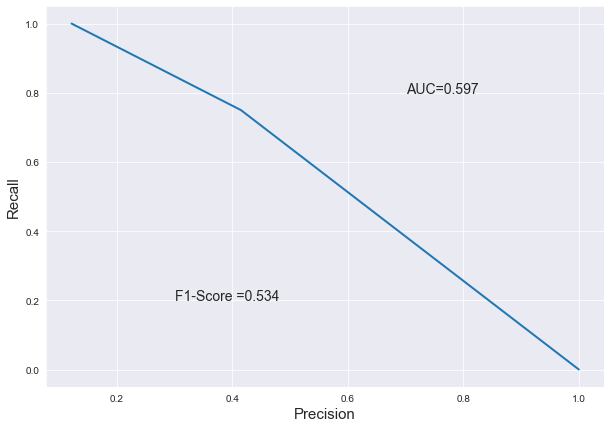

In [139]:
plot_precisionvsrecall(predicted,y_test)

Looks like we couldn't improve the model much. I will try to improve this model by using some techniques to deal with class imbalance in Logistic Regression Notebook 4. Moreover, you can also use `RandomSearchCV()` just like I used GridSearchCV above. 


Additionally, we also have another function that we can use for cross validation in Logistic Regression. Let's briefly look at these functions.

### LogisticRegressionCV

`LogisticRegressionCV()` provides us less fredom than GridSearchCV because here we can only use the function to tune some of the parameters such as C or l1_ratio but we cannot add different penalities and let the function decide which one works best. There are some other changes with different parameters as well, check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html). Moreover, I will do something different this time an add a new parameter called **class_weight**. Normally, when we are using logistic regression the algorithm treats all the classes equally but since we have much higher number instances in negative class we can raise the weight of positive class to improve the result. For more about class_weight check this [link](https://developpaper.com/using-class-weight-to-improve-class-imbalance/) I will use this argument more in the forth notebook on Logistic Regression.

In [54]:
logreg_cv2 = LogisticRegressionCV(cv=skf, random_state=42,Cs=[100, 10, 1.0, 0.1, 0.01],fit_intercept=True,
                                penalty="l1",solver="liblinear",verbose=2,max_iter =250, class_weight={1:5})

In [55]:
model_logregcv2=logreg_cv2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.6min finished


[LibLinear]

In [57]:
predicted_logreg2=logreg_cv2.predict(X_test)

In [58]:
accuracy_score(predicted_logreg2,y_test)

0.7539529767633714

<Figure size 720x504 with 0 Axes>

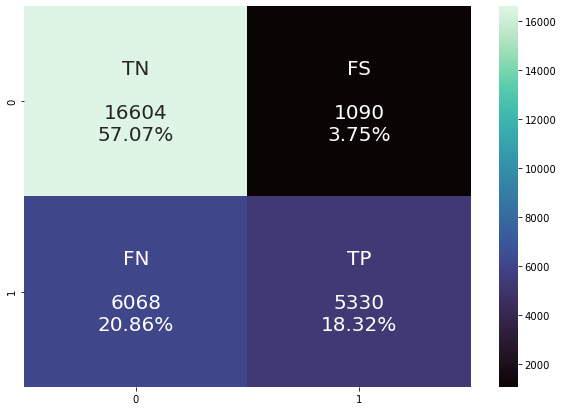

In [59]:
plot_confusion(predicted_logreg2,y_test)

Even If we doubled True Positives, that is not enough. I will address this problem more as I said in the last notebook.

Additional Notes:
1. When I was preparing this notebook I came across with a stackoverflow discussion in which how LogisticRegressionCV calculates best_coefficients_ explained. I share the link here maybe some of you would be interested in it. [link](https://stackoverflow.com/questions/49562046/scikit-learn-logisticregressioncv-best-coefficients)
2. If you visit the LogisticRegression documentation of sklearn, you will see that there is a parameter called dual. Dualitiy is a concept that I will introduce with Support Vector Machines but if you have taken courses like Calculus, Optimization or Linear Algebra I recommend you checking the paper in advance. In  this paper you will find how optimization algorithms are used with Logistic Regression as well as dual formula for Logistic Regression. [A comparison of numerical optimizers for logistic regression](https://tminka.github.io/papers/logreg/minka-logreg.pdf)
3. Lastly If you remember linear regression notebooks, we used a function called SGDRegressor. There is also a classifier version of this function. I will talk about it in SVM notebooks but you can check it in advance [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)